### 목차
1. 웹 크롤링으로 기초 데이터 수집하기  
2. 나무위키 최근 변경 페이지 키워드 분석하기  
3. 특정 키워드가 있는 게시물 크롤링을 위해 트위터 API 사용하기  
4. 트위터 API로 '손흥민'과 연관된 키워드 분석하기  

# 1. 웹 크롤링으로 기초 데이터 수집하기

## 1.1 웹 크롤링 라이브러리 사용하기 

파이썬에서는 **BeatifulSoup**과 **requests**라는 라이브러리로 웹 크롤러를 만들 수 있다.  
requests는 특정 URL로부터 HTML 문서를 가져오는 작업을 수행하는데,    
나무위키 페이지와 같이 HTML문서가 Javascript로 동적 로딩되는 경우가 있다.  
그래서 requests 대신 **Selenium** 라이브러리를 사용하여, 크롬 브라우저로 동적 웹 크롤링을 수행하도록 하겠다.  
셀레니움이란: 컴퓨터에 설치되어있는 웹 브라우저를 자동으로 구동해주는 라이브러리

터미널을 실행하여 아래의 파이썬 모듈을 설치한다.  
- pip install selenium beautifylsoup4

터미널에서 homebrew를 이용하여 chromedriver를 설치한다.  
- brew install chromedriver

In [1]:
## 페이지의 URL 정보 추출하기 ##

# [0] 라이브러리 호출
from selenium import webdriver
from bs4 import BeautifulSoup
import re

# [1] 크롬 드라이버의 실행 경로 지정
path = "/usr/local/bin/chromedriver" # brew로 설치된 chromedriver의 path (Mac)
source_url = "https://namu.wiki/RecentChanges" # 크롤링할 사이트 주소 정의

# [2] 크롬 드라이버를 이용하여 URL의 HTML문서를 가져오기
driver = webdriver.Chrome(path) # 크롬 드라이버 사용
driver.get(source_url) # 드라이버가 브라우징 할 페이지 소스 입력
req = driver.page_source

# [3] 이를 BeautifulSoup() 클래스의 soup 객체로 변환
soup = BeautifulSoup(req, "html.parser") # 사이트의 html 구조에 기반하여 데이터를 파싱

# [4] find(), findall() 함수를 사용하여 특정 HTML 태그 혹은 특정 HTML 클래스를 가진 데이터 가져오기
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

page_url_base = "https://namu.wiki" # a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트 생성
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if "png" not in page_url:
            page_urls.append(page_url)

page_urls = list(set(page_urls)) # 중복 url 제거
for page in page_urls[:3]:
    print(page)

/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/3513294632.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path) # 크롬 드라이버 사용


https://namu.wiki/w/%EC%98%A4%EB%9D%BD%EC%8B%A4/%EC%A0%9C%EC%A3%BC/%ED%8F%90%EC%97%85
https://namu.wiki/w/%ED%8B%80:%EB%A7%88%EB%A6%B0%20%EC%BB%B5
https://namu.wiki/w/%EC%8A%A4%EB%AA%A8%EB%AA%A8%EB%AA%A8%EB%AA%A8%EB%AA%A8%EB%AA%A8%20~%EC%A7%80%EC%83%81%20%EC%B5%9C%EA%B0%95%EC%9D%98%20%EC%8B%A0%EB%B6%80~


에러는 셀레니움이 3에서 4로 업데이트 되면서 기존 방식이 아닌 새로운 방식으로 코드를 작성하라는 의미. 크롤링이 돌아가긴 한다. 

## 1.2 텍스트 정보 수집하기 

다음 코드는 최근 변경된 문서 중 한 페이지의 텍스트 정보를 크롤링한 것이다.  
이전 단계와 다른점은 get()함수 대신 **text()** 함수를 사용하여 태그의 텍스트 정보만을 추출했다는 점이다.

In [2]:
## URL 페이지 정보를 기반으로 크롤링하기 ##

# [1] 크롬 드라이버 사용
driver = webdriver.Chrome(path)

# [2] 드라이버가 브라우징 할 페이지 소스 입력
driver.get(page_urls[0]) # 첫번째 최근 변경된 문서를 크롤링
req = driver.page_source

soup = BeautifulSoup(req, "html.parser")

contents_table = soup.find(name="body") # 본문 # name="article"이 없어서 "body"로 대체
title = contents_table.find_all('h1')[0] # 제목
category = contents_table.find_all('ul')[2] # 카테고리
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"m5t+tA2K"}) # 본문에 있는 모든 텍스트
# attrs: attributes 속성값

content_corpus_list = []
for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

driver.close() # 크롤링에 사용한 브라우저 종료


/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/2173636984.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


오락실/제주/폐업 


오락실없어진 존재


   상위 문서: 오락실/제주폐업된 오락실의 위치정보서울경기인천강원대전세종충남충북부산울산경남대구경북광주전남전북제주1. 작성전 유의사항2. 서귀포시2.1. 아트오락실2.2. 은하수게임랜드3. 제주시3.1. 가족오락관 한라대점3.2. 메가박스 제주 메가게임타운3.3. 제주 원 게임장3.4. 제주 탑동 게임랜드3.5. 제주 어게인 게임장3.6. 제주 유니코 키드랜드3.7. 퍼니랜드 대학로점1. 작성전 유의사항[편집]가나다순입니다.정보를 공유할 만한 오락실이라고 생각한다면 그 오락실에 관한 정보를 올려주세요.현재 영업 중인 제주특별자치도 내의 오락실은 오락실/제주 문서를 참조하십시오.2. 서귀포시[편집]2.1. 아트오락실[편집]주소: 제주특별자치도 서귀포시 중앙로 93영업시간 : 10시 ~보유 했던 게임EZ2DJ platinum 코인 플스게임기타 고전게임들2007년까지 영업했던 오락실, 폐업 이유는 불확실하고 근처 학생들이 자주 찾았다. 지하 오락실이라 분위기가 많이 어둡고 침침했다. 화장실로 가는 계단벽에 크게 원으로 구멍이 나있어, 내부를 볼 수 있었다. 칸막이로 플스게임과 고전게임을 나누어서 배치했으며, 지금은 재활병원으로 바뀌었다.2.2. 은하수게임랜드[편집]주소: 제주특별자치도 서귀포시 동문로 56영업시간: 오전 10시~오후 8시보유 했던 게임EZ2DJ 3rd 1대 - 200 원코인 플스게임(위닝 일레븐)타임 크라이시스메탈슬러그 3KOF 2003스트라이커즈 1945 플러스 (네오지오 기판)삼국전기(IGS버전)버추어 스트라이커2 VER98(JFA제휴 버전)2009년 초반까지 존재했던 오락실. 근처에 서귀포중학교 가 있으며 당시에 하교후 들러오는 학생들로 분주했으며 옆에 PC방[1]과 분식점이 있어서 이용객이 많이 있던 시절이었다.[2] 이 오락실은 90년대 초반에는 지금은 대패삼겹살 집으로 바뀐 곳으로 규모가 큰곳에서 운영했으며 버추어 캅, 메탈슬러그 1, 사무라이 스피리츠 아마쿠사 강림 등 당시에 인기가 많았던 게

# 2. 나무위키 최근 변경 페이지 키워드 분석하기 

## 2.1 크롤링: 웹 데이터 가져오기

이전 단계와 동일한 방법으로 웹 데이터를 크롤링한다.  
단, 이번에는 모든 URL의 데이터를 가져와보자.

In [3]:
## BeautifulSoup을 이용해 웹 크롤링하기 ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import re

# brew로 설치된 chromedriver의 path (Mac)
path = "/usr/local/bin/chromedriver"

# 크롤링할 사이트 주소 정의
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링 수행
driver = webdriver.Chrome(path) # for Mac
driver.get(source_url)
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url 제거
page_urls = list(set(page_urls))

# 크롤링에 사용한 브라우저 종료
driver.close()

/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/3536218100.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path) # for Mac


이제 이 주소들에 다시 한번 접근하여 문서의 본문과 제목, 그리고 카테고리에 등장하는 텍스트 데이터를 가져와보자.

In [21]:
## 나무위키의 최근 변경 데이터 크롤링하기
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 생성
for page_url in page_urls[:5]: # 최근 변경 내역 상위 5개 링크에 대해서만 진행 
    
    # 사이트의 html 구조에 기반하여 크롤링 수행
    driver = webdriver.Chrome(path)
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    
    # 본문... "article"이 없는 경우가 있어서 "body"로 대체
    contents_table = soup.find(name="body") # 본문
    
    # 제목
    # title = contents_table.find_all('h1')[0] # 'list index out of range' 에러 발생해서 아래와 같이 대체
    if len(contents_table.find_all('h1')) > 0:
        title = contents_table.find_all('h1')[0]
    else:
        title = None # 타이틀이 없을 수가 있나
    
    # 카테고리
    # 카테고리 정보가 없는 경우를 확인
    # contenst_table도 article이 없는 경우 있는 경우를 아래처럼 적용할 수 있을 듯
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[2]
    else:
        category = None 
    
    # 본문내의 텍스트 추출
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"m5t+tA2K"})
    content_corpus_list = []
    
    # 페이지 내 '제목' 정보에서 개행 문자를 제거한 뒤 추출
    # 만약 없는 경우, 빈 문자열로 대체
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # '본문' 정보도 위와 같이 처리
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
    
    # '카테고리' 정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추출
    # 만약 없는 경우, 빈 문자열로 대체
    if category is not None:
        row_category = category.text.replace("\n", " ")
        row_category = category.text.replace("분류", " ")
    else: 
        row_category = "" 
    
    
    # 모든 정보를 하나의 데이터 프레임에 저장
    row = [row_title, row_category, "".join(content_corpus_list)] # [제목, 카테고리, 본문]
    # series = pd.Series(row, index=df.columns)
    # df = df.append(series, ignore_index=True) # append 대신 concat 쓰기
    df_new = pd.DataFrame([row], columns=columns)
    df = pd.concat([df, df_new], axis=0, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료
    driver.close()
    
# 데이터 프레임 출력
df.head()

/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/231738873.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/231738873.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/231738873.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/231738873.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
/var/folders/hf/v7h_0c452jq2_96439gvcks40000gn/T/ipykernel_5301/231738873.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = web

,title,category,content_text
0,오락실/제주/폐업,오락실없어진 존재,상위 문서: 오락실/제주폐업된 오락실의 위치정보서울경기인천강원대전세종충남충북부...
1,코타키나발루,말레이시아의 도시코타키나발루휴양지,"코타 키나발루Kota Kinabalu국가말레이시아지역사바면적351㎢인구536,000..."
2,스모모모모모모 ~지상 최강의 신부~,스모모모모모모 ~지상 최강의 신부~일본 만화/목록일본 애니메이션/목록,은(는) 여기로 연결됩니다. 개구리 중사 케로로의 등장인물에 대한 내용은 스모...
3,슈츠슈타펠,슈츠슈타펠,파시즘 [ 펼치기 · 접기 ]이념파시즘 · 군국주의 · 국가주의 · 국수주의 · 전...
4,세르히오 라모스/클럽 경력,축구선수/커리어,"상위 문서: 세르히오 라모스 관련 문서: 세르히오 라모스/국가대표 경력, ..."


## 2.2 추출: 키워드 정보 추출하기 

다음은 수집한 텍스트 데이터에서 키워드 정보를 추출하는 단계입니다.  
이를 위해 **텍스트 전처리** 작업이 필요합니다.  

파이썬에서는 're'라는 모듈을 통해 **정규표현식**을 사용할 수 있습니다.  
정규표현식이란 특정한 규칙을 가진 문자열의 집합을 표현하는 방식입니다. (ex. 한글만 추출)

In [5]:
## 텍스트 데이터 전처리하기 ##
# 텍스트 정제 함수: 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

print(text_cleaning(df['content_text'][0]))

  상위 문서 오락실제주폐업된 오락실의 위치정보서울경기인천강원대전세종충남충북부산울산경남대구경북광주전남전북제주 작성전 유의사항 서귀포시 아트오락실 은하수게임랜드 제주시 가족오락관 한라대점 메가박스 제주 메가게임타운 제주 원 게임장 제주 탑동 게임랜드 제주 어게인 게임장 제주 유니코 키드랜드 퍼니랜드 대학로점 작성전 유의사항편집가나다순입니다정보를 공유할 만한 오락실이라고 생각한다면 그 오락실에 관한 정보를 올려주세요현재 영업 중인 제주특별자치도 내의 오락실은 오락실제주 문서를 참조하십시오 서귀포시편집 아트오락실편집주소 제주특별자치도 서귀포시 중앙로 영업시간  시 보유 했던 게임  코인 플스게임기타 고전게임들년까지 영업했던 오락실 폐업 이유는 불확실하고 근처 학생들이 자주 찾았다 지하 오락실이라 분위기가 많이 어둡고 침침했다 화장실로 가는 계단벽에 크게 원으로 구멍이 나있어 내부를 볼 수 있었다 칸막이로 플스게임과 고전게임을 나누어서 배치했으며 지금은 재활병원으로 바뀌었다 은하수게임랜드편집주소 제주특별자치도 서귀포시 동문로 영업시간 오전 시오후 시보유 했던 게임  대   원코인 플스게임위닝 일레븐타임 크라이시스메탈슬러그  스트라이커즈  플러스 네오지오 기판삼국전기버전버추어 스트라이커 제휴 버전년 초반까지 존재했던 오락실 근처에 서귀포중학교 가 있으며 당시에 하교후 들러오는 학생들로 분주했으며 옆에 방과 분식점이 있어서 이용객이 많이 있던 시절이었다 이 오락실은 년대 초반에는 지금은 대패삼겹살 집으로 바뀐 곳으로 규모가 큰곳에서 운영했으며 버추어 캅 메탈슬러그  사무라이 스피리츠 아마쿠사 강림 등 당시에 인기가 많았던 게임들을 가동했으며 화장품도 겸업으로 했었다 그러다 년대 중반에 자금 사정으로 현재 다방이 있는 규모로 바꿔서 운영했으며 점주분의 건강악화 사정등으로 가게를 넘겼다   의 상태가 매우 안좋게 유지되었다 폐업 이후 다방은 지금도 정상 운영중이다 제주시편집 가족오락관 한라대점편집주소 제주특별자치도 제주시 한라대학로   네이버 거리뷰위치 한라대학교 정문 근처

In [6]:
## 모든 데이터에 전처리 적용하기 ##
# 각 피처마다 데이터 전처리를 적용합니다
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,오락실제주폐업,오락실없어진 존재,상위 문서 오락실제주폐업된 오락실의 위치정보서울경기인천강원대전세종충남충북부산울산...
1,코타키나발루,말레이시아의 도시코타키나발루휴양지,코타 키나발루 국가말레이시아지역사바면적인구 년 기준시장노르딘 시만시간대코타키나발루 ...
2,스모모모모모모 지상 최강의 신부,스모모모모모모 지상 최강의 신부일본 만화목록일본 애니메이션목록,은는 여기로 연결됩니다 개구리 중사 케로로의 등장인물에 대한 내용은 스모모 문서...
3,슈츠슈타펠,슈츠슈타펠,파시즘 펼치기 접기 이념파시즘 군국주의 국가주의 국수주의 전체주의 권위...
4,세르히오 라모스클럽 경력,축구선수커리어,상위 문서 세르히오 라모스 관련 문서 세르히오 라모스국가대표 경력 개...


다음 과정은 키워드를 추출한 뒤, 빈도 분석을 수행한다.  
키워드 추출이란 좁은 의미에서는 명사, 혹은 형태소 단위의 문자열을 추출하는 것이다.  
이를 수행하기 위해 말뭉치라는 것을 만들어야 한다.  
말뭉치는 말 그대로 텍스트 데이터의 뭉텅이를 의미한다.  
이번 예제에서는 제목 말뭉치, 카테고리 말뭉치, 본문 말뭉치 총 3개의 말뭉치를 생성한다.

In [7]:
## 각 피처마다 말뭉치 만들기 ##
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

# join 함수는 매개변수 요소 하나하나를 합쳐서 하나의 문자열로 바꾸어 반환하는 함수
# "".join(['a', 'b', 'c']) -> "abc" 문자열 반환
# "_".join(['a', 'b', 'c']) -> "a_b_c" 문자열 반환 # "구분자".join(list)

오락실제주폐업 코타키나발루 스모모모모모모 지상 최강의 신부 슈츠슈타펠 세르히오 라모스클럽 경력 


In [8]:
# "".join() 인데 공백이 있는 이유
df['title'].tolist() # 모든 요소 마지막에 공백이 있음 # 위에서 텍스트 전처리할 때 "\n"을 " "로 바꾼 결과

['오락실제주폐업 ', '코타키나발루 ', '스모모모모모모 지상 최강의 신부 ', '슈츠슈타펠 ', '세르히오 라모스클럽 경력 ']

이제 각 말뭉치 안에서 등장하는 형태소를 추출한다.  
파이썬의 한국어 형태소 추출 라이브러리 중 가장 쉽게 사용할 수 있는 konlpy를 사용한다.

In [14]:
## konlpy를 이용해 키워드 추출하기 ##
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
count.most_common(5)

[('것', 110), ('독일', 110), ('이', 100), ('번', 94), ('문단', 92)]

우선 한 글자 키워드를 제거한다. 특정한 의미를 가지는 한 글자 키워드는 따로 예외 처리를 해주는 것이 좋지만 본 예제에서는 그러한 과정을 생략한다.  

In [13]:
## 키워드 가다듬기: 한 글자 키워드 제거하기 ##
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1}) # 길이가 2 이상인 단어만 추출
print(remove_char_counter.most_common(5))

[('독일', 110), ('문단', 92), ('친위대', 79), ('문서', 72), ('역사', 65)]


이제 실질적인 의미가 없는 키워드를 처리한다.  
'입니다', '그', '저' 와 같은 관사나 접속사 등은 실질적인 의미가 없으면서 동시에 의미적인 독립을 할 수 없는 품사이다.  
이러한 키워드를 **불용어**라고 한다.
텍스트 마이닝에서는 불용어를 분석 단계에서 제거하는 과정을 거친다.  
이 단계에서 필요한 것이 **불용어 사전**이다.  
아래의 stopwords가 한국어의 약식 불용어 사전 예시이다. 이 불용어 사전에는 '아', '휴' 처럼 키워드로서의 의미를 가지지 않는 형태소들이 포함되어 있다.  

In [15]:
## 키워드 가다듬기: 불용어 사전 ##
# 한국어 약식 불용어 사전 예시 파일. 출처: https://www.ranks.nl/stopwords/korean
korean_stopwords_path = 'Desktop/python-data-analysis-master/data/korean_stopwords.txt'

# 텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords] # 문자열 및 공백 제거. 선행과 후행 문자가 제거된 문자열을 반환
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


현재 분석 중인 데이터에서만 적용되는 불용어도 추가해주어야 한다.  
'상위', '문서', '내용'과 같은 단어를 불용어 사전에 추가해보자.  
이 단어들은 나무위키 문서 페이지에서 많이 사용하는 단어이지만 특별한 의미를 가지지 않는 키워드이다.  
만약 이러한 불용어를 더 많이 추가한다면 키워드 분석의 질을 더욱 높일 수 있다.

In [17]:
## 키워드 가다듬기: 불용어 제거하기 ##
# 나무위키 페이지에 적용이 필요한 불용어 추가
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용',
                      '매우', '가장', '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도',
                       '이후', '사실', '생각', '인물', '이름', '년월']

for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

# 키워드 데이터에서 불용어 제거
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords}) 
# stoprwords에 포함 안 되는 단어만 추출

print(remove_char_counter.most_common(5))

[('독일', 110), ('문단', 92), ('친위대', 79), ('역사', 65), ('국방군', 61)]


##  2.3 시각화: 워드 클라우드 시각화하기

키워드 빈도 분석에 가장 적합한 시각화 방식은 **워드 클라우드** 기법이다.  
파이썬에서는 여러 가지 워드 클라우드 패키지를 제공하는데 그 중에서 가장 널리 사용되는 **pytagcloud**를 사용해보자.  

[1] pytagcloud 패키지 설치  
pip install pytagcloud pygame simplejson

[2] 한글 폰트 다운받기  
https://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf

[3] pytagcloud 패키지 경로에 한글 폰트 복사하기
다운로드한 폰트를 아나콘다의 가상환경 라이브러리 패키지 경로에 복사한다.  
경로: /Users/hyegwan/opt/anaconda3/envs/pybook/lib/python3.8/site-packages/pytagcloud/fonts 

[4] 현재 폴더에 있는 fonts.json 파일을 아래와 같이 수정하기  

[{  

    
        "name": "NanumGothic",
        "ttf": "NanumGothic.ttf",
        "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"

}]

pygame 2.1.2 (SDL 2.0.18, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


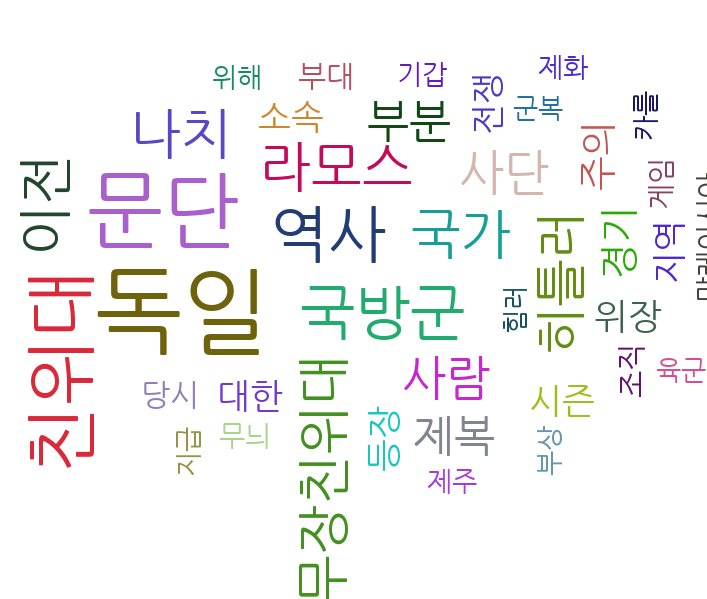

In [18]:
## pytagcloud 사용하기 ##
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력. 단어 출력의 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지 생성. 폰트는 나눔 고딕
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', 
                            size=(900, 600), 
                            fontname='NanumGothic', 
                            rectangular=False) # 워드클라우드를 사각형으로 할 건지, 원형으로 출력할 건지 명시

# 생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename='wordcloud.jpg')

**정리**  
- 정규표현식을 활용한 텍스트 전처리  
    텍스트 분석 방향에 맞는 문자를 선별하는 방법이다. 예제에서는 한글을 추출하기 위한 정규표현식을 적용하였다.

- 형태소 분석기를 활용한 키워드 추출  
    konlpy 등의 형태소 분석기를 통해 데이터에서 키워드를 추출할 수 있다.  
    
- 불용어 사전 적용  
    많이 등장하지만 실질적인 의미를 갖지 못하는 형태소를 '불용어'라고 정의하고, 이를 데이터에서 제거한다.  

# 3. 특정 키워드가 있는 게시물 크롤링을 위해 트위터 API 사용하기 

이번에는 SNS 데이터의 연관 키워드를 분석해보자.  
예제에서는 가장 기본적인 관계 분석 방법인 **연관 규칙(Association Rule)** 을 활용하여 키워드 간의 관계를 분석한다.  
그리고 이를 네트워크 그래프로 시각화하는 과정까지 학습한다.  

[1] 트위터 API 등록 - 메모장에서 토큰 메모 참고

[2] 파이썬 API 설정  
tweepy 라이브러리 설치 - pip install tweepy

In [19]:
## 파이썬 API 사용하기 ##
import tweepy

# 발급 완료된 KEY를 입력
CONSUMER_KEY = ""
CONSUMER_SECRET = "" 
ACCESS_TOKEN_KEY = ""
ACCESS_TOKEN_SECRET = "" # 셀이 돌아간 후 삭제

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth)

# twitter API를 사용하여 '손흥민'이 포함된 트윗들을 크롤링한 뒤, entities에서 'user_mentions', 'hashtags'를 추출한다
keyword = "손흥민"
tweets = api.search_tweets(keyword)
for tweet in tweets[:3]: # 예시로 3개만 크롤링
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.text)

[{'screen_name': 'Son7_THA', 'name': 'SonheungminFCThai 🇹🇭🇰🇷 (AsiaFan)', 'id': 1530985172258390018, 'id_str': '1530985172258390018', 'indices': [3, 12]}]
[{'text': 'HMSJ07', 'indices': [77, 84]}, {'text': 'HMFCT07', 'indices': [85, 93]}, {'text': 'SON7', 'indices': [94, 99]}, {'text': 'loveSS', 'indices': [100, 107]}, {'text': 'COYS', 'indices': [108, 113]}, {'text': 'THFC', 'indices': [114, 119]}, {'text': 'Sonny', 'indices': [120, 126]}]
RT @Son7_THA: 🎧Cause I know what you like boy
You’re my chemical hype boy 🎧

#HMSJ07​#HMFCT07​#SON7​#loveSS​#COYS​#THFC​#Sonny​#sonheungmin…
[{'screen_name': 'shmpics', 'name': 'ؘ', 'id': 1528688142798442497, 'id_str': '1528688142798442497', 'indices': [3, 11]}]
[{'text': 'Sonny', 'indices': [50, 56]}, {'text': '손흥민', 'indices': [60, 64]}, {'text': 'SonHeungMin', 'indices': [65, 77]}]
RT @shmpics: Pape Matar Sarr’s TikTok update with #Sonny! 

#손흥민 #SonHeungMin https://t.co/OnRrgF6g5V
[{'screen_name': 'MbG6OULFha21BQr', 'name': '손흥민 결혼반대😠', 'id': 130

# 4. 트위터 API로 '손흥민'과 연관된 키워드 분석하기 

이번 예제에서 사용할 **연관 분석** 이란 **데이터의 집합으로부터 특별한 규칙을 찾아내는 분석 방법** 이다.  

ex.) 기저귀를 구매하는 사람들은 휴지도 함께 구매한다  
조건절 A: 기저귀를 구매한다
결과절 B: 휴지를 구매한다 

이러한 규칙을 평가할 수 있는 지표로는 **지지도(support)와 신뢰도(confidence), 그리고 향상도(lift)** 와 같은 지표들이 있다.

평가지표 

[1] 지지도 support  
- (A의 지지도) support A = P(A)
- (규칙에 대한 지지도) support A -> B = P(A교B)  

[2] 신뢰도 confidence  
- confidence A -> B = P(B|A) = P(A교B) / P(A)

[3] 향상도 lift
- lift A -> B = P(B|A)/P(B) = P(A교B) / (P(A) * P(B))
- 일반적으로 향상도는 1보다 큰 것이 좋다.

## 4.1 API 호출: 트위터 API로 데이터 가져오기 

'손흥민'이라는 키워드를 포함한 트윗 데이터를 수집해보자.  
먼저, 크롤링된 메타데이터에서 텍스트 데이터만을 수집한다.  
아래처럼 Cursor 객체를 이용하면 1000개의 트윗 데이터를 수집할 수 있다.

In [23]:
## API 데이터로 데이터 프레임 생성하기 ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy

# 발급 완료된 KEY를 입력
CONSUMER_KEY = ""
CONSUMER_SECRET = "" 
ACCESS_TOKEN_KEY = ""
ACCESS_TOKEN_SECRET = "" # 셀이 돌아간 후 삭제

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth)

# 크롤링된 데이터를 저장할 데이터 프레임
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 크롤링을 수행할 갯수를 입력하고, Cursor 객체를 사용하여 크롤링을 수행
max_tweets = 1000
keyword = "손흥민"
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q=keyword).items(max_tweets)]

# '손흥민'이 포함된 1000개의 트윗들에서, 'text', 'created_at' 정보를 데이터 프레임으로 저장합니다. 
for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet_json['text']
    created = tweet_json['created_at']
    row = [created, tweet_text]
    # series = pd.Series(row, index=df.columns)
    # df = df.append(series, ignore_index=True)
    # The frame.append method is deprecated and will be removed from pandas in a future version. 
    # Use pandas.concat instead.
    
    # concat으로 dataframe 이랑 series를 합칠 수 없어서,, (같은 타입끼리만 되는듯?)
    # 아니면 방법이 있는데 내가 몰라서 ㅋㅋ 
    # series 말고 dataframe 형식으로 새로 만들어서 붙이기
    # 이때 df_append에 columns를 df와 똑같이 지정해줘야 원하는대로 기존 df 밑에 똑디 붙음
    # columns 지정 안 하면 기존 df 옆에 붙어서 세로로 쌓인다. (기존 df의 값으로는 NaN이 채워진다)
    df_append = pd.DataFrame([row], columns=columns)
    df = pd.concat([df, df_append], axis=0, ignore_index=True)

df.head() 

,created,tweet_text
0,Thu Feb 09 03:32:44 +0000 2023,RT @MbG6OULFha21BQr: 악🤣 손흥민ㅋㅋ\n현실말투ㅋㅋ\n내 친구인줄ㅋ...
1,Thu Feb 09 03:32:38 +0000 2023,RT @shmlswpshos: 손흥민은 써서 음료수 까지 먹고 있는데 이강인은 미각...
2,Thu Feb 09 03:26:46 +0000 2023,RT @Son7_THA: 🎧Cause I know what you like boy\...
3,Thu Feb 09 03:25:59 +0000 2023,RT @shmpics: Pape Matar Sarr’s TikTok update w...
4,Thu Feb 09 03:25:37 +0000 2023,RT @MbG6OULFha21BQr: 악🤣 손흥민ㅋㅋ\n현실말투ㅋㅋ\n내 친구인줄ㅋ...


## 4.2 추출: 키워드 추출하기 

한글 문자열을 기준으로 키워드 추출을 수행한다.  
text_cleaning()함수로 데이터 프레임에 정규표현식을 적용한다.  

In [24]:
## 텍스트 데이터 전처리 하기 ##
import re

# 텍스트 정제 함수: 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    # result = hangul.sub('', text) # substitute 
    result = re.sub(hangul, '', text) # re.sub（정규 표현식, 치환 문자, 대상 문자열）
    return result

# 'tweet_text' 피처에 이를 적용
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Thu Feb 09 03:32:44 +0000 2023,RT @MbG6OULFha21BQr: 악🤣 손흥민ㅋㅋ\n현실말투ㅋㅋ\n내 친구인줄ㅋ...,악 손흥민ㅋㅋ현실말투ㅋㅋ내 친구인줄ㅋㅋㅋ
1,Thu Feb 09 03:32:38 +0000 2023,RT @shmlswpshos: 손흥민은 써서 음료수 까지 먹고 있는데 이강인은 미각...,손흥민은 써서 음료수 까지 먹고 있는데 이강인은 미각도 강인한 남자인가봄
2,Thu Feb 09 03:26:46 +0000 2023,RT @Son7_THA: 🎧Cause I know what you like boy\...,
3,Thu Feb 09 03:25:59 +0000 2023,RT @shmpics: Pape Matar Sarr’s TikTok update w...,손흥민
4,Thu Feb 09 03:25:37 +0000 2023,RT @MbG6OULFha21BQr: 악🤣 손흥민ㅋㅋ\n현실말투ㅋㅋ\n내 친구인줄ㅋ...,악 손흥민ㅋㅋ현실말투ㅋㅋ내 친구인줄ㅋㅋㅋ


이번에는 형태소 데이터를 연관 분석에 용이한 데이터 형태로 만들기 위해  
말뭉치를 만들지 않고 **하나의 열 데이터 단위**로 키워드를 추출한다.  
이 과정에서는 Okt 클래스의 nouns를 사용하여 명사 단위의 키워드를 추출한다.

In [25]:
## konlpy를 이용한 키워드 추출하기 ##
# 한국어 약식 불용어 사전 예시 파일. 출처: https://www.ranks.nl/stopwords/korean
korean_stopwords_path = 'Desktop/python-data-analysis-master/data/korean_stopwords.txt'

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines() 
    # 개행 문자(\n)를 기준으로 모든 줄을 읽어서 한 라인씩 리스트로 값을 반환 (각 라인이 리스트의 각 요소가 된다)
    # f.readline()과 다름 유의! readline은 리스트로 반환하지 않고 한 줄씩 읽는데에 그친다.

stopwords1= [x.strip() for x in stopwords] # 문자열 앞뒤의 공백 또는 특별한 문자 삭제
# 여기서 개행문자가 삭제 된다.

In [26]:
print(stopwords[:3])
print(stopwords1[:3])

['아\n', '휴\n', '아이구\n']
['아', '휴', '아이구']


In [27]:
from konlpy.tag import Okt
from collections import Counter

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x) # Okt 클래스의 nouns를 사용하여 명사 단위의 키워드 추출
    
    # 한 글자 키워드 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

# 'ko_text' 피처에 get_nouns 함수 적용
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
df.head()

,created,tweet_text,ko_text,nouns
0,Thu Feb 09 03:32:44 +0000 2023,RT @MbG6OULFha21BQr: 악🤣 손흥민ㅋㅋ\n현실말투ㅋㅋ\n내 친구인줄ㅋ...,악 손흥민ㅋㅋ현실말투ㅋㅋ내 친구인줄ㅋㅋㅋ,"[손흥민, 현실, 말투, 친구]"
1,Thu Feb 09 03:32:38 +0000 2023,RT @shmlswpshos: 손흥민은 써서 음료수 까지 먹고 있는데 이강인은 미각...,손흥민은 써서 음료수 까지 먹고 있는데 이강인은 미각도 강인한 남자인가봄,"[손흥민, 음료수, 이강인, 미각, 남자]"
2,Thu Feb 09 03:26:46 +0000 2023,RT @Son7_THA: 🎧Cause I know what you like boy\...,,[]
3,Thu Feb 09 03:25:59 +0000 2023,RT @shmpics: Pape Matar Sarr’s TikTok update w...,손흥민,[손흥민]
4,Thu Feb 09 03:25:37 +0000 2023,RT @MbG6OULFha21BQr: 악🤣 손흥민ㅋㅋ\n현실말투ㅋㅋ\n내 친구인줄ㅋ...,악 손흥민ㅋㅋ현실말투ㅋㅋ내 친구인줄ㅋㅋㅋ,"[손흥민, 현실, 말투, 친구]"


##  4.3 분석: 연관 분석을 이용한 키워드 분석하기

apyori 라이브러리를 사용하면 df[nouns] 형태의 데이터에서 연관 규칙을 쉽게 실행할 수 있다.  
- pip install apyori

연관 규칙의 지지도, 신뢰도, 향상도, 나아가 규칙의 조건절과 결과절까지 확인할 수 있다.

아래에서 사용된 apriori() 함수는 *Apriori 알고리즘*을 적용하여 연관 규칙을 계산하는 함수이다.  

Apriori 알고리즘이란  
데이터에서 생성될 수 있는 가능한 모든 연관 규칙 중에 빈발 집합(Frequent sets)만을 우선적으로 고려하여 규칙 생성의 과정을 간소화한 것이다.  
일반적인 연관 분석은 데이터에서 생성될 수 있는 모든 규칙을 계산하기 때문에 Apriori와 같은 *빈도 제한 알고리즘*을 사용하는 것이 더욱 효율적이다.  

Apriori는 초월 집합(Superset)이라는 개념을 도입하여 규칙의 형태를 제한한다.  
만약 규칙 (A)의 지지도가 의미 있는 수준을 넘지 못한다면 초월 집합들((A,B), (A,B,C))의 지지도는 더욱 작을 것이다.  
이 때문에 A의 초월 집합들은 굳이 계산할 필요가 없는 규칙들이 된다.  
따라서 (A)의 초월집합들을 제한하면 일종의 가지치기처럼 규칙의 형태를 효율적으로 제한할 수 있다.

In [30]:
## 파이썬에서 연관 분석 사용하기 ##
from apyori import apriori

# df[nouns] 형태의 데이터(트랜잭션 데이터)를 생성
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']  
]

# 연관 분석 수행
results = list(apriori(transactions))
results[:3]

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])]

In [31]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 
# (손흥민, 케인)처럼 규칙의 크기가 2 이하인 규칙을 추출
list(apriori(transactions, 
            min_support=0.5,
            min_confidence=0.6,
            min_lift=1.0,
            max_length=2)
    )

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

이제 연관 분석을 트위터 키워드에 적용하고 연관 규칙을 추출한다.  

In [33]:
## 트위터 연관 키워드 분석하기 ##
# 트랜잭션 데이터를 추출
transactions = df['nouns'].tolist()

# 공백 문자열 방지
transactions = [transaction for transaction in transactions if transaction]

print(transactions[:5])

[['손흥민', '현실', '말투', '친구'], ['손흥민', '음료수', '이강인', '미각', '남자'], ['손흥민'], ['손흥민', '현실', '말투', '친구'], ['손흥민']]


In [36]:
# 연관 분석 수행 (파라미터 적용)
results = list(apriori(transactions,
                      min_support=0.05,
                      min_confidnece=0.1,
                      min_lift=5,
                      max_length=2))
print(results[:3])

[RelationRecord(items=frozenset({'얼굴', '레전드'}), support=0.054600606673407485, ordered_statistics=[OrderedStatistic(items_base=frozenset({'레전드'}), items_add=frozenset({'얼굴'}), confidence=0.9152542372881357, lift=15.880463871543268), OrderedStatistic(items_base=frozenset({'얼굴'}), items_add=frozenset({'레전드'}), confidence=0.9473684210526316, lift=15.880463871543267)]), RelationRecord(items=frozenset({'타임', '레전드'}), support=0.054600606673407485, ordered_statistics=[OrderedStatistic(items_base=frozenset({'레전드'}), items_add=frozenset({'타임'}), confidence=0.9152542372881357, lift=14.368038740920099), OrderedStatistic(items_base=frozenset({'타임'}), items_add=frozenset({'레전드'}), confidence=0.8571428571428572, lift=14.368038740920099)]), RelationRecord(items=frozenset({'맨시티', '이강인'}), support=0.1557128412537917, ordered_statistics=[OrderedStatistic(items_base=frozenset({'맨시티'}), items_add=frozenset({'이강인'}), confidence=0.9935483870967741, lift=5.5203334541500535), OrderedStatistic(items_base=frozen

In [37]:
# 위 결과를 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support'] # ['조건절', '결과절', '지지도']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        df_new = pd.DataFrame([row], columns=columns) # [row], row 차이는 아래에 
        network_df = pd.concat([network_df, df_new], axis=0, ignore_index=True)

network_df.head()

,source,target,support
0,얼굴,레전드,0.054601
1,타임,레전드,0.054601
2,맨시티,이강인,0.155713
3,맨시티,이승기,0.155713
4,맨시티,튀르키예,0.155713


In [38]:
# [row], row 차이
df1 = pd.DataFrame([row])
df1

,0,1,2
0,튀르키예,이승기,0.158746


In [39]:
df2 = pd.DataFrame(row)
df2

,0
0,튀르키예
1,이승기
2,0.158746


이번에는 키워드 각각의 빈도를 계산하여 저장해보자.

In [41]:
## 키워드 빈도 추출하기 ##
# 말뭉치 추출
tweet_corpus = "".join(df['ko_text'].tolist())

from konlpy.tag import Okt
from collections import Counter

# 명사 키워드 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한 글자 키워드 제거
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1}) # 딕셔너리

# 키워드와 키워드 빈도 점수를 'node', 'nodesize'라는 데이터 프레임 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
# 시각화의 편의를 위해 'nodesize' 50 이하는 제거
node_df = node_df[node_df['nodesize'] >= 50]

node_df.head() 

,node,nodesize
0,손흥민,1079
5,이강인,180
12,타임,63
18,선수,97
34,최고,67


## 4.4 시각화: 연관 키워드 네트워크 시각화하기

networkx라이브러리를 사용하여 (network_df, node_df) 2개의 데이터 프레임으로 네트워크 시각화를 수행한다.  
- pip install networkx

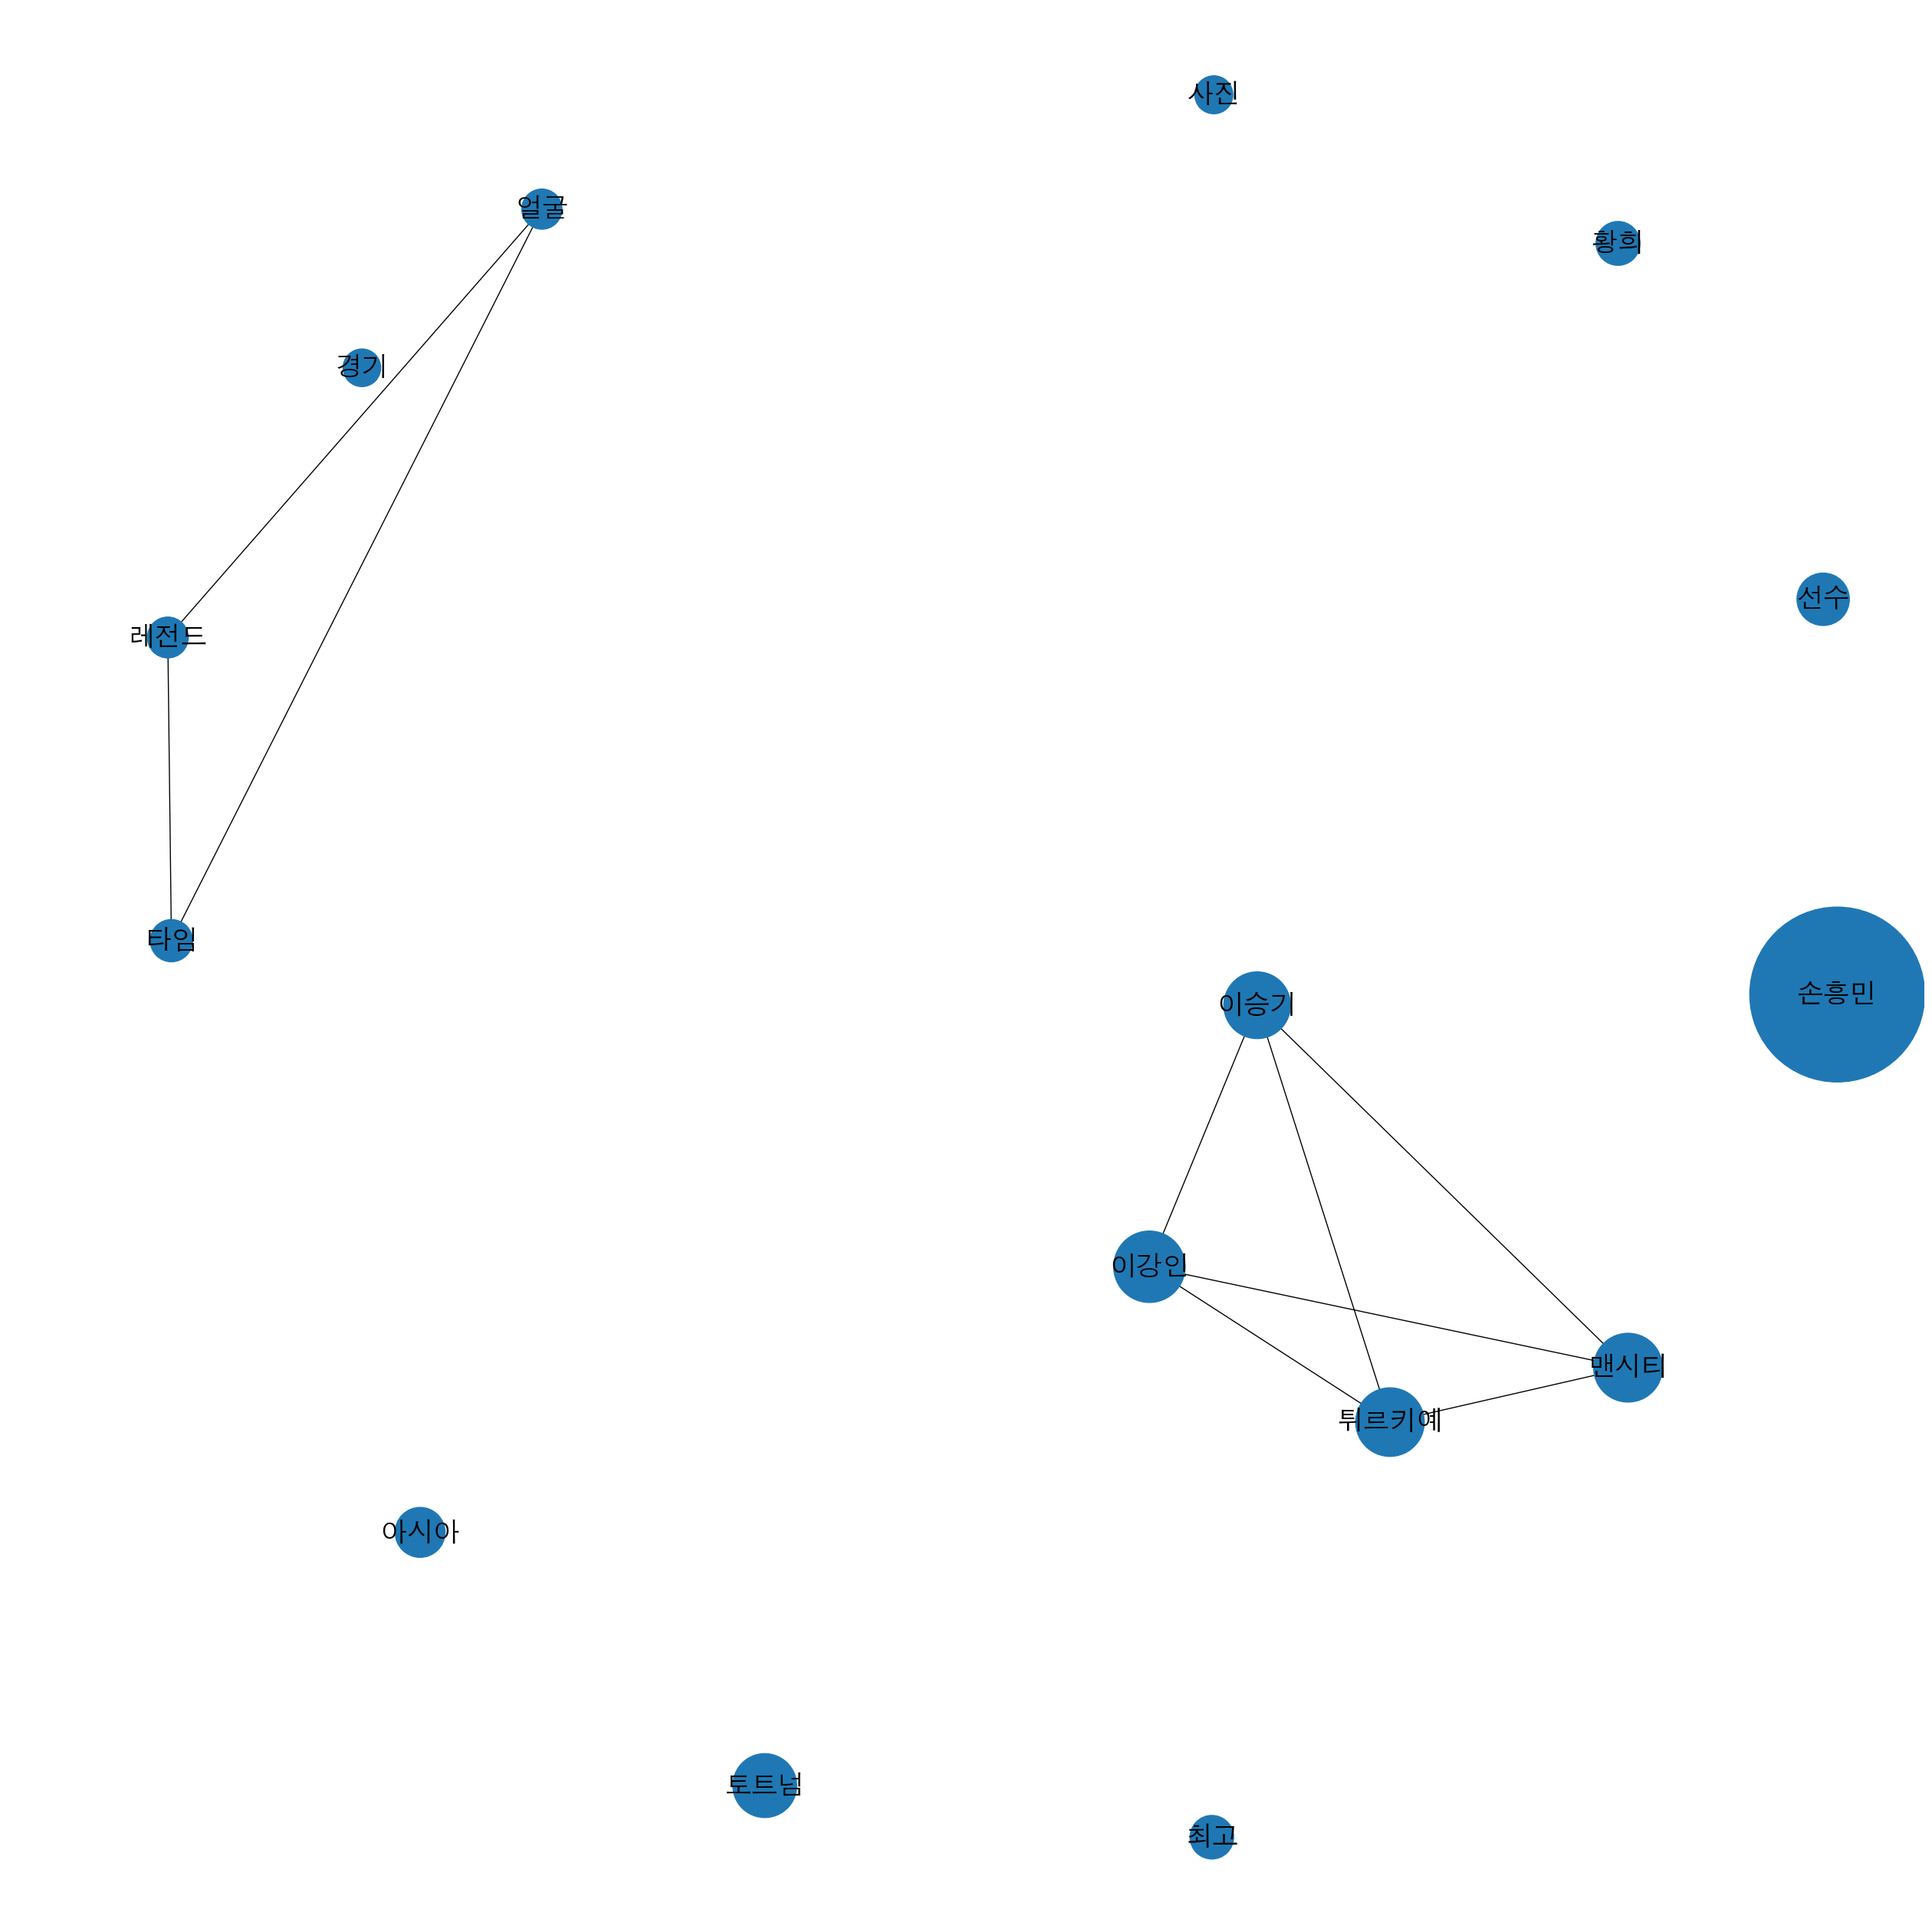

In [42]:
## 연관 키워드 네트워크 시각화하기 ##
import networkx as nx

plt.figure(figsize=(25, 25)) # plot figure 생성

# networkx 그래프 객체 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여 네트워크 그래프의 '노드' 역할을 하는 원을 생성
for index, row in node_df.iterrows(): # iterrows(): 각 행의 정보를 담은 객체 # (index, row_series)
    G.add_node(row['node'], nodesize=row['nodesize']) # add_node(): 그래프 노드 생성

# network_df의 연관 분석 데이터를 기반으로 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터 설정
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)
nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic', font_size=25)

# 그래프 출력
ax = plt.gca()
plt.show()

### 정리
- 연관 규칙 분석  
    트랜잭션 데이터에 연관 규칙을 적용하고, 키워드 간의 지지도, 신뢰도, 향상도를 검토해보아야 한다.  
- Apriori 알고리즘 적용  
    큰 규모의 데이터를 처리하기 위해서는 Apriori와 같은 알고리즘을 도입해야 한다.  
    Apriori는 superset을 이용하여 빈도가 낮은 하위 집합을 가지치기하는 방법이다.  